In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 10)

In [2]:
# df = pd.DataFrame({'from':[1,1,1,2,2,3,3,3,4,5,6], 'to':[4,5,6,4,5,4,5,6,7,7,8], 'dpth':[0,0,0,0,0,0,0,0,1,1,1]})
df = pd.read_csv('data/edgeListTrackers-AdsOwners.csv', sep=';', names=['from','to','company'])
df = df[df.company != 'Unknown']

In [3]:
df

,from,to,company
0,allegro.pl,cx.atdmt.com,Facebook
1,allegro.pl,cm.g.doubleclick.net,Google
2,allegro.pl,stats.g.doubleclick.net,Google
3,allegro.pl,pagead2.googlesyndication.com,Google
4,allegro.pl,securepubads.g.doubleclick.net,Google
...,...,...,...
379,benchmark.pl,stats.g.doubleclick.net,Google
380,spidersweb.pl,stats.g.doubleclick.net,Google
381,spidersweb.pl,mc.yandex.ru,Yandex
382,spidersweb.pl,pagead2.googlesyndication.com,Google


In [4]:
df.company.value_counts()

Google                          195
AppNexus                         29
Onet                             19
Verizon Media                    17
Facebook                         14
Wirtualna Polska                 13
New Relic                         9
RTB House                         9
Ringier Axel Springer Polska      6
Yandex                            6
home.pl                           5
Twitter                           4
YourCX                            3
OLX Group                         3
Microsoft                         3
Sovrn Holdings                    3
Inmar                             3
PayPal                            2
AGORA                             2
Reddit                            2
Amazon.com                        1
Mail.Ru                           1
Indeed                            1
Automattic                        1
Groupon                           1
Centro                            1
TripAdvisor                       1
Skyscanner                  

---------------

In [5]:
def pop_random_tracker(subnetwork):
    trackers = subnetwork.to.unique()
    t = random.choice(trackers)
    return subnetwork[subnetwork.to != t].copy()

def random_attack(subnetwork, n_trials = 30):
    results = [{'clients':0,'trackers':0}]
    subnetwork_copy = subnetwork.copy()
    for i in range(n_trials):
        subnetwork = subnetwork_copy.copy()
        Nclients = subnetwork['from'].unique().size
        Ntrackers = subnetwork['to'].unique().size

        while len(subnetwork) > 0:
            clients = subnetwork['from'].unique().size
            trackers = subnetwork['to'].unique().size
            results.append({'clients':clients/Nclients, 
                            'trackers':trackers/Ntrackers
                           })
            subnetwork = pop_random_tracker(subnetwork)
    return pd.DataFrame(results)

In [6]:
def pop_most_common_tracker(subnetwork):
    trackers = subnetwork.to.unique()
    t = subnetwork['to'].value_counts().keys()[0]
    return subnetwork[subnetwork.to != t].copy()

def adversarial_attack(subnetwork):
    results = []
    subnetwork = subnetwork.copy()
    Nclients = subnetwork['from'].unique().size
    Ntrackers = subnetwork['to'].unique().size

    while len(subnetwork) > 0:
        clients = subnetwork['from'].unique().size
        trackers = subnetwork['to'].unique().size
        results.append({'clients':clients/Nclients, 
                        'trackers':trackers/Ntrackers
                        })
        subnetwork = pop_most_common_tracker(subnetwork)
    results.append({'clients':0,'trackers':0})
    return pd.DataFrame(results)

In [7]:
def greedy_pop_tracker(subnetwork):
    trackers = subnetwork.to.unique()
    min_clients = subnetwork['from'].unique().size
    t_best = subnetwork['to'].value_counts().keys()[0]
    for t in trackers:
        clients = subnetwork[subnetwork.to != t]['from'].unique().size
        if clients < min_clients:
            t_best = t
    return subnetwork[subnetwork.to != t_best].copy()

def greedy_attack(subnetwork):
    results = []
    subnetwork = subnetwork.copy()
    Nclients = subnetwork['from'].unique().size
    Ntrackers = subnetwork['to'].unique().size

    while len(subnetwork) > 0:
        clients = subnetwork['from'].unique().size
        trackers = subnetwork['to'].unique().size
        results.append({'clients':clients/Nclients, 
                        'trackers':trackers/Ntrackers
                        })
        subnetwork = greedy_pop_tracker(subnetwork)
    results.append({'clients':0,'trackers':0})
    return pd.DataFrame(results)

In [8]:
company_names = df.company.unique()#[:5]
experiments = {}
for c in company_names:
    company_trackers = df[df.company == c]['to'].unique()
    if len(company_trackers) <= 1:
        continue
    subnetwork = df[df.to.isin(company_trackers)][['from','to']]
    
    company_clients = subnetwork['from'].unique()
    attack_data = random_attack(subnetwork)
    experiments[c]= attack_data
#     plt.figure()
#     sns.lineplot(data=attack_data, x='trackers', y='clients').set(ylim=(0,1), xlim=(0,1))
# #     print('random attack on '+c, attack_data)
#     plt.title('random attack on '+c+ f' (company has {company_clients.size} clients and {company_trackers.size} trackers)')

In [9]:
company_names = df.company.unique()#[:5]
adversarial_experiments = {}
for c in company_names:
    company_trackers = df[df.company == c]['to'].unique()
    if len(company_trackers) <= 1:
        continue
    subnetwork = df[df.to.isin(company_trackers)][['from','to']]
    
    company_clients = subnetwork['from'].unique()
    attack_data = adversarial_attack(subnetwork)
    adversarial_experiments[c]= attack_data
#     plt.figure()
#     sns.lineplot(data=attack_data, x='trackers', y='clients').set(ylim=(0,1), xlim=(0,1))
# #     print('random attack on '+c, attack_data)
#     plt.title('adversatial attack on '+c+ f' (company has {company_clients.size} clients and {company_trackers.size} trackers)')

In [10]:
company_names = df.company.unique()#[:5]
greedy_experiments = {}
for c in company_names:
    company_trackers = df[df.company == c]['to'].unique()
    if len(company_trackers) <= 1:
        continue
    subnetwork = df[df.to.isin(company_trackers)][['from','to']]
    
    company_clients = subnetwork['from'].unique()
    attack_data = greedy_attack(subnetwork)
    greedy_experiments[c]= attack_data

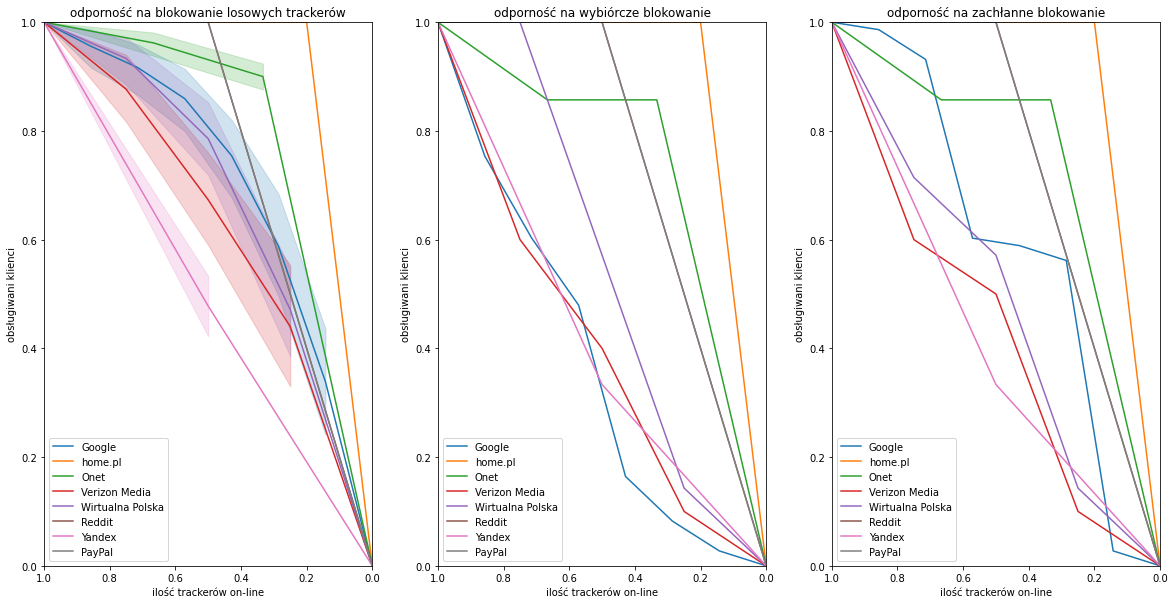

In [11]:
fig, axs = plt.subplots(1,3, figsize=(20,10))
for c, attack_data in experiments.items():
    sns.lineplot(data=attack_data, x='trackers', y='clients', ax=axs[0]).set(
        ylim=(0,1), 
        xlim=(1,0),
        ylabel='obsługiwani klienci',
        xlabel='ilość trackerów on-line',
        title = 'odporność na blokowanie losowych trackerów'
    )
axs[0].legend(experiments.keys());

for c, attack_data in adversarial_experiments.items():
    sns.lineplot(data=attack_data, x='trackers', y='clients', ax=axs[1]).set(
        ylim=(0,1), 
        xlim=(1,0),
        ylabel='obsługiwani klienci',
        xlabel='ilość trackerów on-line',
        title = 'odporność na wybiórcze blokowanie'
    )
axs[1].legend(adversarial_experiments.keys());

for c, attack_data in greedy_experiments.items():
    sns.lineplot(data=attack_data, x='trackers', y='clients', ax=axs[2]).set(
        ylim=(0,1), 
        xlim=(1,0),
        ylabel='obsługiwani klienci',
        xlabel='ilość trackerów on-line',
        title = 'odporność na zachłanne blokowanie'
    )
axs[2].legend(greedy_experiments.keys());

--------------------

In [12]:
# add Unknown again
df = pd.read_csv('data/edgeListTrackers-AdsOwners.csv', sep=';', names=['from','to','company'])


global_random_experiments = {}
for c in ['wszystkie firmy razem']:
    attack_data = random_attack(df[['from','to']])
    global_random_experiments[c]= attack_data
    
global_adversarial_experiments = {}
for c in ['wszystkie firmy razem']:
    attack_data = adversarial_attack(df[['from','to']])
    global_adversarial_experiments[c]= attack_data


global_greedy_experiments = {}
for c in ['wszystkie firmy razem']:
    attack_data = greedy_attack(df[['from','to']])
    global_greedy_experiments[c]= attack_data

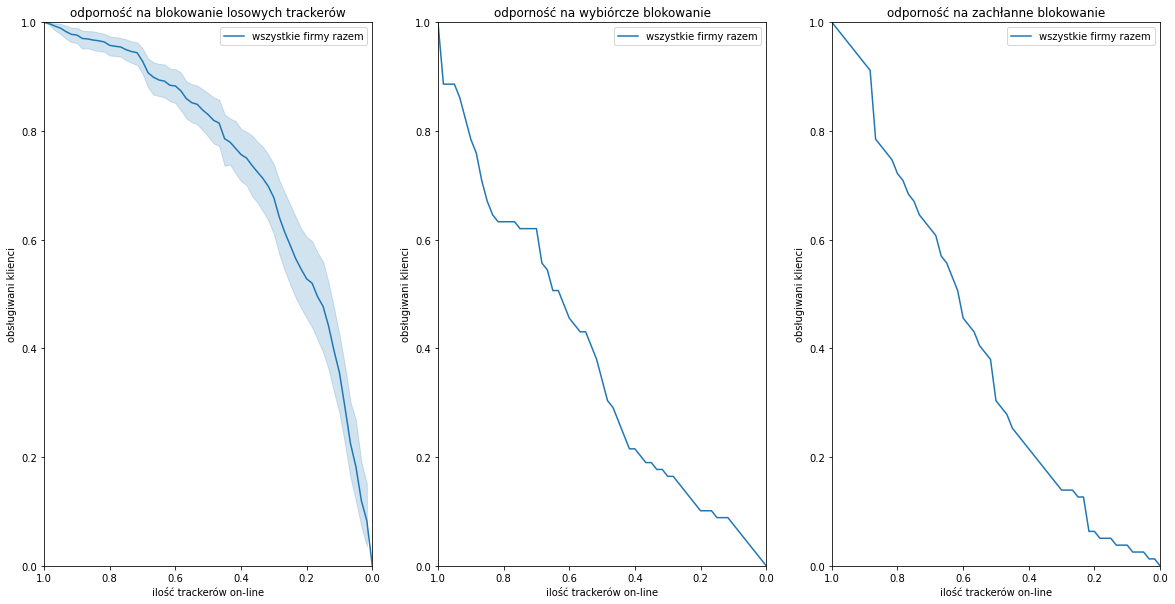

In [13]:
fig, axs = plt.subplots(1,3, figsize=(20,10))
for c, attack_data in global_random_experiments.items():
    sns.lineplot(data=attack_data, x='trackers', y='clients', ax=axs[0]).set(
        ylim=(0,1), 
        xlim=(1,0),
        ylabel='obsługiwani klienci',
        xlabel='ilość trackerów on-line',
        title = 'odporność na blokowanie losowych trackerów'
    )
axs[0].legend(global_random_experiments.keys());

for c, attack_data in global_adversarial_experiments.items():
    sns.lineplot(data=attack_data, x='trackers', y='clients', ax=axs[1]).set(
        ylim=(0,1), 
        xlim=(1,0),
        ylabel='obsługiwani klienci',
        xlabel='ilość trackerów on-line',
        title = 'odporność na wybiórcze blokowanie'
    )
axs[1].legend(global_adversarial_experiments.keys());

for c, attack_data in global_greedy_experiments.items():
    sns.lineplot(data=attack_data, x='trackers', y='clients', ax=axs[2]).set(
        ylim=(0,1), 
        xlim=(1,0),
        ylabel='obsługiwani klienci',
        xlabel='ilość trackerów on-line',
        title = 'odporność na zachłanne blokowanie'
    )
axs[2].legend(global_greedy_experiments.keys());